## Test neo4j

In [4]:

import nest_asyncio

nest_asyncio.apply()

In [51]:
import asyncio
from neo4j import AsyncGraphDatabase
import json

URI = "bolt://localhost:7687"
AUTH = ("neo4j", "ttt@123ASD")

async def query_neo():
    async with AsyncGraphDatabase.driver(URI, auth=AUTH) as driver:
        query = """
            MATCH (n)
            RETURN labels(n) AS Labels, n AS Properties
        """
        records, summary, keys = await driver.execute_query(
            query,
            database_="neo4j"
        )

        # print("Keys:", keys)
        # for record in records:
        #     properties = record["Properties"]
        #     node_content = json.loads(properties["_node_content"])
        #     metadata = node_content["relationships"]
        #     print('properties', metadata)
        #     break
            # node_id = properties.get("id")
            # text = properties.get("text")
            # print('record', record)
            # print('metadata', properties.metadata)
            # # break
            # print('property', properties['relationships'])
            # if node_id is not None and text is not None:
            #     print(f"Node ID: {node_id}, Text: {text[:30]}..., Type: {record['Labels']}")
            # else:
            #     print(f"Node ID: {node_id}...")

        return records


asyncio.run(query_neo())

[<Record Labels=['__Node__', 'Chunk'] Properties=<Node element_id='4:c9175aa1-74a8-47eb-9110-710878eb2fec:0' labels=frozenset({'Chunk', '__Node__'}) properties={'file_path': '/Users/ngocp/Documents/projects/finance-bot/data/bao-chi/ftp.md', 'ref_doc_id': 'aa24d8ca-6f21-411e-8fbb-598f02813e5d', 'file_name': 'ftp.md', 'last_modified_date': '2024-10-18', 'creation_date': '2024-10-18', 'document_id': 'aa24d8ca-6f21-411e-8fbb-598f02813e5d', 'doc_id': 'aa24d8ca-6f21-411e-8fbb-598f02813e5d', 'file_size': 3591, '_node_content': '{"id_": "b735b9e9-ad4d-4afe-8c83-984d663457b7", "embedding": null, "metadata": {"file_path": "/Users/ngocp/Documents/projects/finance-bot/data/bao-chi/ftp.md", "file_name": "ftp.md", "file_size": 3591, "creation_date": "2024-10-18", "last_modified_date": "2024-10-18"}, "excluded_embed_metadata_keys": ["file_name", "file_type", "file_size", "creation_date", "last_modified_date", "last_accessed_date"], "excluded_llm_metadata_keys": ["file_name", "file_type", "file_size",

## Visualization

node: b735b9e9-ad4d-4afe-8c83-984d663457b7 FPT báo lãi trước thuế gần 3.0
node: 33cd8f08-091f-43ca-8f49-0130724298c3 Kết quả kinh doanh của FPT tro
node: 30401d7a-fbc4-42a3-b8bc-00f9c930a202 FPT báo lãi trước thuế gần 3.0
node: 01d26afa-e9a9-4394-8c0e-9b96d0bbd5a8 Mảng Dịch vụ CNTT trong nước


node: 260ffeda-5e6b-4726-b03c-e176d51ab2e3 Mảng Dịch vụ Viễn thông

- Doa
node: 619d0a64-dd33-426c-817e-eeb1d3caddd4 Mảng giáo dục

- Doanh thu đạt
node: 58cec91d-1963-4f11-a5d3-e1cf91b5309d FPT báo lãi trước thuế gần 3.0
node: 53c62cc7-4f0e-404a-bd70-5f08ecb2ea1d Kết quả kinh doanh của FPT tro
node: e9399331-eea8-4e95-a07c-a02250d25683 FPT báo lãi trước thuế gần 3.0
node: 7b708476-bf8e-4a31-bbc7-1f8c816e93b8 Mảng Dịch vụ CNTT trong nước


node: 15dc672a-05c5-4061-87e8-d32243cc8675 Mảng Dịch vụ Viễn thông

- Doa
node: 4819f223-3f6b-41de-a8e3-a286e3ae2440 Mảng giáo dục

- Doanh thu đạt
edge: b735b9e9-ad4d-4afe-8c83-984d663457b7 aa24d8ca-6f21-411e-8fbb-598f02813e5d
edge: 33cd8f08-091f-43ca-8f49-01

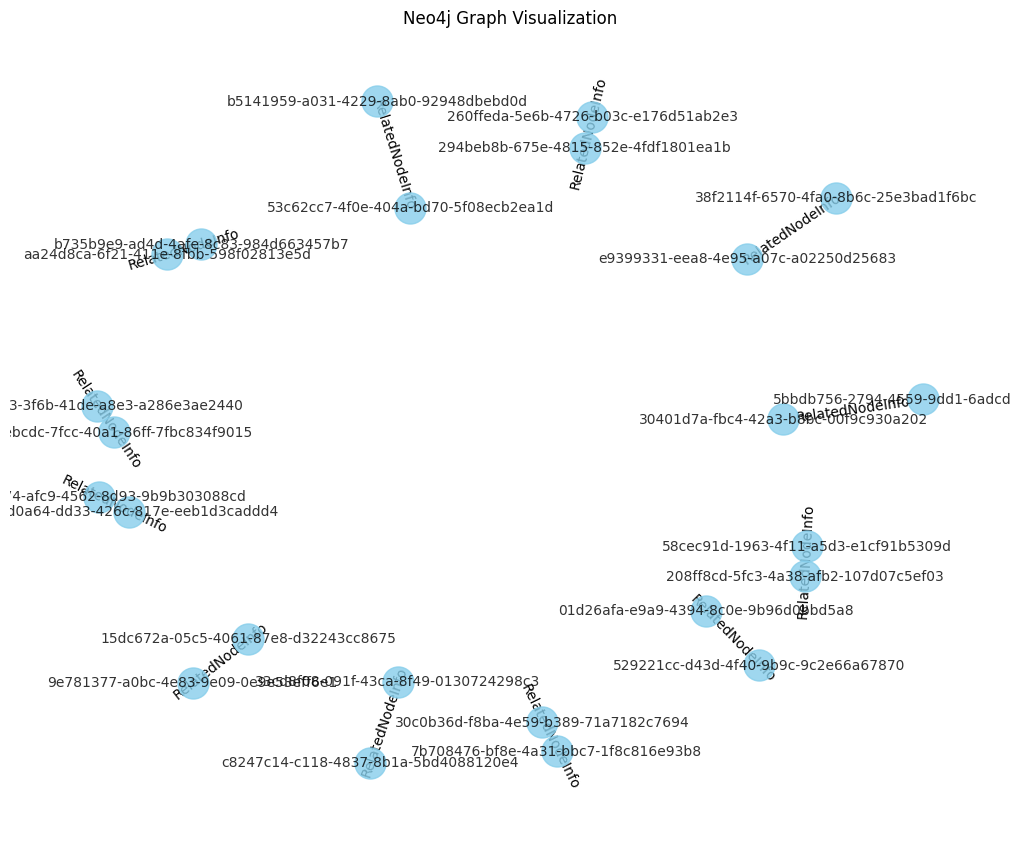

In [55]:
import networkx as nx
import matplotlib.pyplot as plt

import networkx as nx
import matplotlib.pyplot as plt

def visualize(result):
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes and edges to the graph
    for record in result:
        node = record['Properties']
        node_id = node.get('id')
        if node_id is None:
            continue
        node_label = node['text'][:30] if node['text'] is not None else "No Label"
        print('node:', node_id, node_label)
        G.add_node(node_id, label=node_label)


    for record in result:
        node = record["Properties"]
        node_id = node.get('id')
        if node_id is None:
            continue
        node_content = json.loads(node["_node_content"])
        relationships = node_content["relationships"]

        for rel_id, rel_info in relationships.items():
            related_node_id = rel_info['node_id']
            print('edge:', node_id, related_node_id)
            G.add_edge(node_id, related_node_id, label=rel_info['class_name'])

    # Calculate positions for all nodes
    pos = nx.spring_layout(G)  # Positions for all nodes
    labels = nx.get_edge_attributes(G, 'label')

    # Visualize the graph using Matplotlib
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", 
            font_size=10, font_color="black", edge_color="gray", linewidths=1, alpha=0.8)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    plt.title("Neo4j Graph Visualization")
    plt.show()

    return G

result = asyncio.run(query_neo())
visualize(result)

